In [1]:
from nanograd.nn import MLP, Layer, Neuron
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [29]:
# Number of training examples 
n = 1000

# Simulate data from a Multivariate Normal
# Two balanced classes
class_0 = np.random.multivariate_normal(
    np.array([2, 2]), np.array([[0.2, 0], [0, 0.2]]), size=int(0.5 * n)
)


class_1 = np.random.multivariate_normal(
    np.array([-1, 2]), np.array([[1, 0], [0, 1]]), size=int(0.5 * n)
)


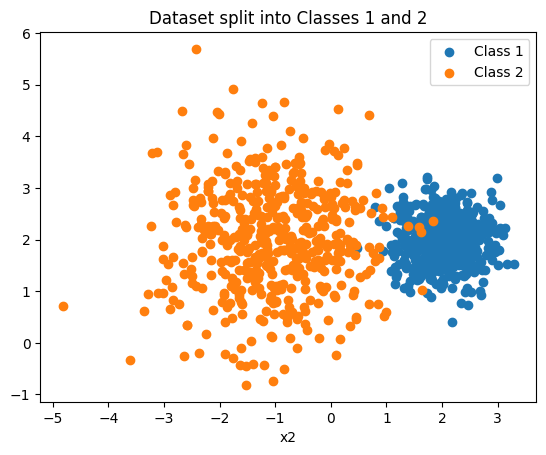

In [37]:
plt.scatter(class_0[:, 0], class_0[:, 1], label  = "Class 1")
plt.scatter(class_1[:, 0], class_1[:, 1], label = "Class 2")
plt.title("Dataset split into Classes 1 and 2")
plt.xlabel('x1')
plt.xlabel('x2')
plt.legend()
plt.show()


In [38]:
x = np.concatenate([class_0, class_1], axis=0)
y = np.concatenate([np.zeros(int(0.5 * n)), np.ones(int(0.5 * n))])
idx_shuffle = np.random.choice(np.arange(x.shape[0]), size=x.shape[0], replace=False)

In [39]:
train_split = int(0.8 * n)
dev_split = int(0.1 * n) + train_split
test_split = int(0.1 * n) + dev_split

train_idx = idx_shuffle[:train_split]
dev_idx = idx_shuffle[train_split:dev_split]
test_idx = idx_shuffle[dev_split:]


In [40]:
x_train, y_train = x[train_idx, :], y[train_idx]
x_dev, y_dev = x[dev_idx, :], y[dev_idx]
x_test, y_test = x[test_idx, :], y[test_idx]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


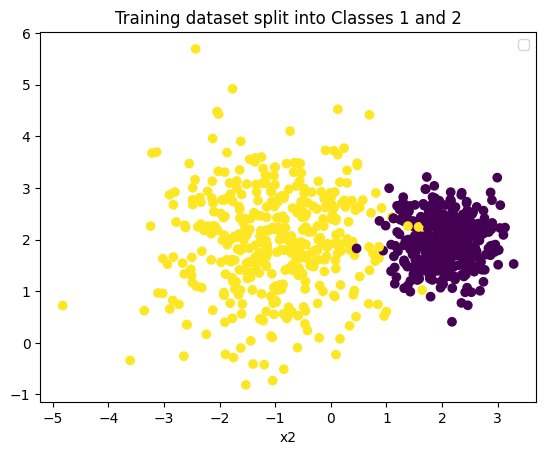

In [45]:
# plot the training set, dev set and test sets 
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.title("Training dataset split into Classes 1 and 2")
plt.xlabel('x1')
plt.xlabel('x2')
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


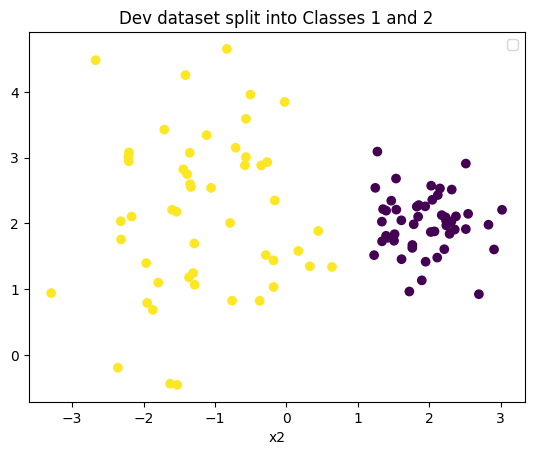

In [46]:
# plot the training set, dev set and test sets 
plt.scatter(x_dev[:, 0], x_dev[:, 1], c=y_dev)
plt.title("Dev dataset split into Classes 1 and 2")
plt.xlabel('x1')
plt.xlabel('x2')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


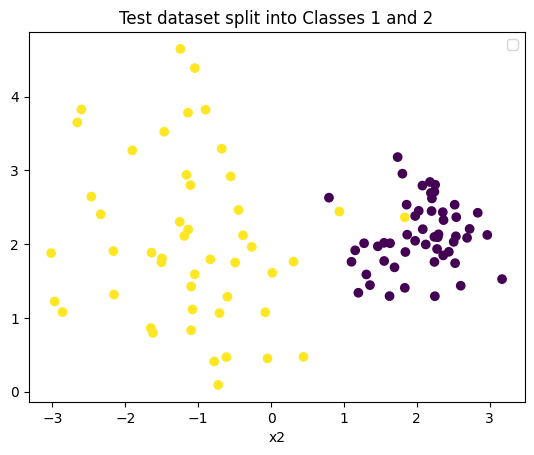

In [47]:
# plot the training set, dev set and test sets
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test)
plt.title("Test dataset split into Classes 1 and 2")
plt.xlabel("x1")
plt.xlabel("x2")
plt.legend()
plt.show()


In [70]:
# Create the MLP
net = MLP(
    [
        Layer(2, 10, activation="sigmoid"),
        Layer(10, 2, activation="sigmoid"),
        Layer(2, 1, activation="sigmoid"),
    ]
)


In [78]:
# Training loss
xs = []
ys = []

# Dev loss
xs_dev = []
ys_dev = []

# Test Loss
xs_test = []
ys_test = []


# parameters
batch_size = 32
epochs = 5
learning_rate = 0.1

def get_batches(x, y, batch_size):
    # Randomly shuffles the indices
    idx = np.random.choice(np.arange(x.shape[0]), replace=False)
    xb = x[idx]
    y = y[idx]
    for start, stop in zip(np.arange(0, x.shape[0], batch_size), np.arange(batch_size, x.shape[0], batch_size)):
        yield xb[start:stop, :], y[start:stop]


In [81]:
x_train[np.random.choice(np.arange(20), 20)]
   

array([[ 2.33459986,  1.90631367],
       [-2.35550831,  2.81056384],
       [ 1.57661991,  1.56646757],
       [-2.39039513,  2.24467136],
       [-0.23713988,  1.79841876],
       [-2.35550831,  2.81056384],
       [-0.23713988,  1.79841876],
       [-0.48750022,  0.69563174],
       [ 1.68636197,  2.30781885],
       [-0.48750022,  0.69563174],
       [-1.3621444 ,  1.65245985],
       [-3.60674022, -0.34166847],
       [ 1.96064377,  1.87018988],
       [ 1.31804648,  1.05704877],
       [-0.23713988,  1.79841876],
       [ 2.08756006,  2.04076305],
       [-0.23713988,  1.79841876],
       [ 2.40189688,  1.95600787],
       [ 2.33459986,  1.90631367],
       [-3.02180519,  0.95825874]])

In [79]:
# Implement the training loop
for j in range(epochs):

    for x, y in get_batches(x_train,y_train, batch_size):
        net.zero_grad()
        loss = (
            sum((net(x_train[i, :]) - y_train[i]) ** 2 for i in range(x_train.shape[0]))
            / x_train.shape[0]
        )
        loss.backward()

        xs.append(j)
        ys.append(loss.item())

        for p in net.parameters():
            p.data += -learning_rate * p.grad

    if j % 5 == 0:
        loss_dev = (
            sum((net(x_dev[i, :]) - y_dev[i]) ** 2 for i in range(x_dev.shape[0]))
            / x_dev.shape[0]
        )

        xs_dev.append(j)
        ys_dev.append(loss_dev.item())

        loss_test = (
            sum((net(x_test[i, :]) - y_test[i]) ** 2 for i in range(x_test.shape[0]))
            / x_test.shape[0]
        )
        xs_test.append(j)
        ys_test.append(loss_test.item())


(2,)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

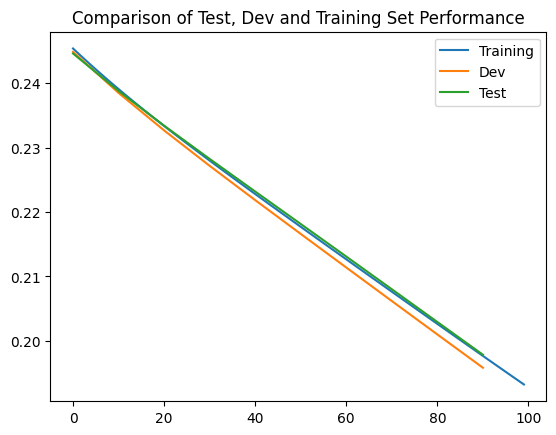

In [62]:
plt.plot(xs, ys, label="Training")
plt.plot(xs_dev,  ys_dev, label="Dev")
plt.plot(xs_test, ys_test, label="Test")
plt.legend()
plt.title("Comparison of Test, Dev and Training Set Performance")
plt.show()


In [63]:
# Get the accuracy on each of the training and test set
# As the classes are mostly balanced this is a good enough measur
def report_accuracy(n, x, y):
    return sum(round(n(x[i, :]).data) == y[i] for i in range(x.shape[0])) / x.shape[0]


In [64]:
# Reports classification accuracy of around 0.97 ish 
print(f"Training Accuracy = {report_accuracy(net, x_train, y_train)}")
print(f"Dev Accuracy = {report_accuracy(net, x_dev, y_dev)}")
print(f"Test Accuracy = {report_accuracy(net, x_test, y_test)}")


Training Accuracy = 0.9725
Dev Accuracy = 0.99
Test Accuracy = 0.95
